In [1]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import pandas as pd
from shapely.ops import unary_union

In [2]:

# Load Shapefiles
shapefile1 = gpd.read_file("C:/Users/laura/Desktop/Housing/SocialHousing/data/raw/plz.shp")
shapefile2 = gpd.read_file("C:/Users/laura/Desktop/Housing/SocialHousing/data/raw/lor_planungsraeume_2021.shp")

# Set the geometry column name explicitly
shapefile1 = shapefile1.set_geometry('geometry')
shapefile2 = shapefile2.set_geometry('geometry')

shapefile2 = shapefile2[['PLR_ID', 'geometry' ]]

shapefile1['g1'] = shapefile1.geometry
shapefile2['g2'] = shapefile2.geometry
# Plotting the shapefiles 
# shapefile1.plot() - > Plots the second element 
# shapefile1.loc[1, 'geometry'] - > PLots the first element


In [3]:
shapefile1_sub = shapefile1.loc[shapefile1['plz'] == '10785',:]
shapefile2_sub = shapefile2.loc[shapefile2['PLR_ID'] == '01100102',:]

In [4]:
len(shapefile2)

542

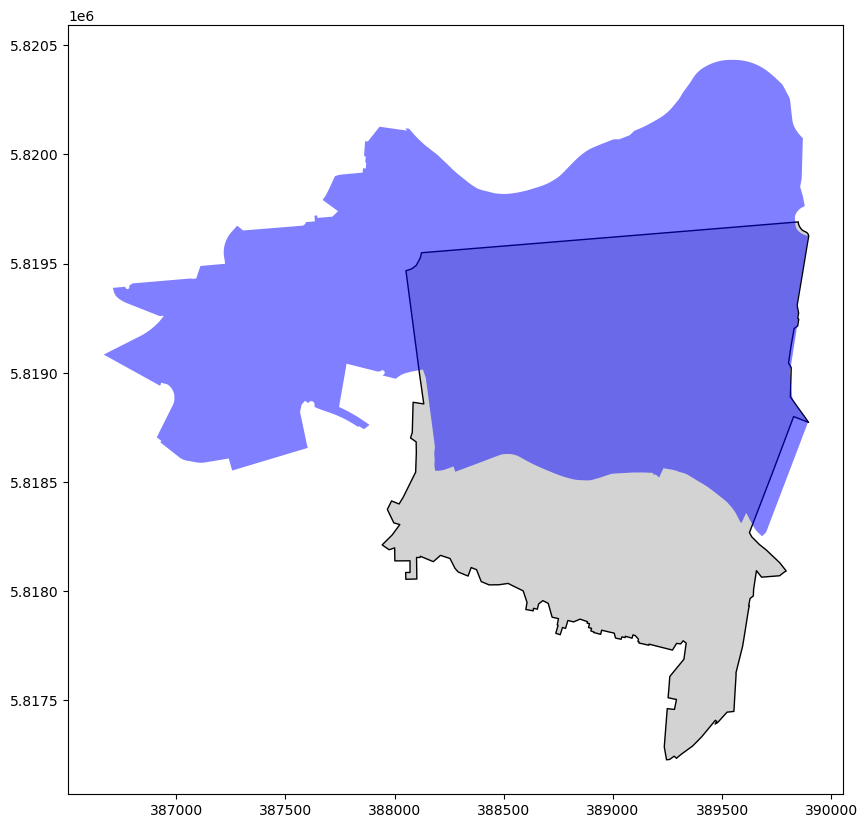

In [5]:
# Graph both of the polygons together 
# Plot the result
fig, ax = plt.subplots(figsize=(10, 10))
shapefile1_sub.plot(ax=ax, color='lightgray', edgecolor='black')
shapefile2_sub.plot(ax=ax, color='blue', alpha=0.5)
plt.show()


In [6]:
inter = shapefile1.sjoin(shapefile2)

In [7]:
inter.head()

,plz,geometry,g1,index_right,PLR_ID,g2
0,10115,"POLYGON ((389163.210 5821872.935, 389165.641 5...","POLYGON ((389163.210 5821872.935, 389165.641 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5..."
1,10117,"POLYGON ((389678.019 5820987.307, 389712.823 5...","POLYGON ((389678.019 5820987.307, 389712.823 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5..."
2,10119,"POLYGON ((391390.987 5820861.119, 391369.354 5...","POLYGON ((391390.987 5820861.119, 391369.354 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5..."
3,10178,"POLYGON ((391390.987 5820861.119, 391546.214 5...","POLYGON ((391390.987 5820861.119, 391546.214 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5..."
4,10179,"POLYGON ((391627.933 5819203.750, 391758.914 5...","POLYGON ((391627.933 5819203.750, 391758.914 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5..."


In [8]:
def f(frame):
    """A function to calculate overlap percentage"""
    interpct = 100*frame.g1.intersection(frame.g2).area/frame.g2.area
    return interpct

inter['pct'] = inter.apply(f, axis=1)

def h(frame):
    """A function to calculate overlap percentage"""
    interpct = 100*frame.g1.intersection(frame.g2).area/frame.g1.area
    return interpct
inter['pct_plz'] = inter.apply(h, axis=1)

In [9]:
def g(frame): 
    area1 = frame.g1.intersection(frame.g2).area
    return area1 

def s(frame): 
    area2 = frame.g2.area
    return area2
    
inter ['area_intersect'] = inter.apply(g, axis=1)
inter ['area_PLRID'] = inter.apply(s, axis=1)

In [10]:
inter.head()

,plz,geometry,g1,index_right,PLR_ID,g2,pct,pct_plz,area_intersect,area_PLRID
0,10115,"POLYGON ((389163.210 5821872.935, 389165.641 5...","POLYGON ((389163.210 5821872.935, 389165.641 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5...",19.977482,8.757584,201943.972519,1.010858e+06
1,10117,"POLYGON ((389678.019 5820987.307, 389712.823 5...","POLYGON ((389678.019 5820987.307, 389712.823 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5...",27.963833,8.218900,282674.640278,1.010858e+06
2,10119,"POLYGON ((391390.987 5820861.119, 391369.354 5...","POLYGON ((391390.987 5820861.119, 391369.354 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5...",27.562531,28.577861,278618.048192,1.010858e+06
3,10178,"POLYGON ((391390.987 5820861.119, 391546.214 5...","POLYGON ((391390.987 5820861.119, 391546.214 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5...",24.298627,13.221858,245624.607901,1.010858e+06
4,10179,"POLYGON ((391627.933 5819203.750, 391758.914 5...","POLYGON ((391627.933 5819203.750, 391758.914 5...",334,01100309,"POLYGON ((391871.045 5820451.238, 391869.981 5...",0.197527,0.090826,1996.718459,1.010858e+06


In [11]:
# This is code to keep only those areas for which more then 50% was mached 
#inter_100 = inter.loc[inter['pct'] >= 50,:]
#len(inter_100)
#inter_100.plot()
shapefile1_sub = shapefile1.loc[shapefile1['plz'] == '10785',:]
shapefile2_sub = shapefile2.loc[shapefile2['PLR_ID'] == '01100102',:]

In [12]:
final_areas = inter.groupby('PLR_ID', group_keys=False).apply(lambda x: x.loc[x.pct.idxmax()])
len(final_areas)

542

In [13]:
final_areas.head()

,plz,geometry,g1,index_right,PLR_ID,g2,pct,pct_plz,area_intersect,area_PLRID
PLR_ID,,,,,,,,,,
01100101,10787,"POLYGON ((387973.509 5819508.755, 387994.142 5...","POLYGON ((387973.5091000004 5819508.7553, 3879...",531,01100101,"POLYGON ((387952.642 5818274.558, 387924.234 5...",89.373037,22.785279,3.277738e+05,3.667480e+05
01100102,10785,"POLYGON ((389813.704 5819026.681, 389810.807 5...",POLYGON ((389813.70440000016 5819026.681299999...,228,01100102,"POLYGON ((389869.32742 5820074.331006, 389869....",47.376183,61.175769,1.867296e+06,3.941423e+06
01100103,10785,"POLYGON ((389813.704 5819026.681, 389810.807 5...",POLYGON ((389813.70440000016 5819026.681299999...,56,01100103,"POLYGON ((387952.642 5818274.558, 387986.686 5...",99.637180,17.040232,5.201268e+05,5.220208e+05
01100104,10785,"POLYGON ((389813.704 5819026.681, 389810.807 5...",POLYGON ((389813.70440000016 5819026.681299999...,186,01100104,"POLYGON ((389319.585 5817775.805, 389310.128 5...",99.999991,11.082604,3.382794e+05,3.382794e+05
01100205,10117,"POLYGON ((389678.019 5820987.307, 389712.823 5...",POLYGON ((389678.0190000003 5820987.3072999995...,459,01100205,"POLYGON ((389835.709 5819672.186, 389851.284 5...",99.829067,18.411699,6.332381e+05,6.343223e+05


In [14]:
print(final_areas['area_intersect'].sum())
print(final_areas['area_PLRID'].sum())

760780519.3064375
890665100.285563


In [15]:
# Finding adjacent neighbors 
final_areas["neighbors"] = None 

In [16]:
for index, country in gdf.iterrows():
    # get 'not disjoint' countries
    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].NAME.tolist()
     # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.NAME != name ]

    # add names of neighbors as NEIGHBORS value
    gdf.at[index, "neighbors"] = ", ".join(neighbors)

NameError: name 'gdf' is not defined

In [ ]:
final_areas.head()

In [17]:
# Export the data
# PLR_ID is the index in the 
final_areas = final_areas[[ 'plz', 'pct', 'area_intersect', 'area_PLRID']]
final_areas.to_stata('C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/areas_merged1.dta')

inter = inter[[ 'PLR_ID','plz','pct_plz', 'pct', 'area_intersect', 'area_PLRID']]
inter.to_stata('C:/Users/laura/Desktop/Housing/SocialHousing/data/temp/areas_merged2.dta')
